<a href="https://colab.research.google.com/github/alextakele/RAG-based-LLM-Applications-for-Contract-Advisory/blob/main/RAG_pipline-with%20_RAGAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Set up

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/RAG-based-LLM/data/'
os.chdir(folder_path)


Mounted at /content/drive


from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/RAG-based-LLM/data/'
os.chdir(folder_path)

In [ ]:
!pip install -U -q langchain langchain-openai langchain_core langchain-community langchainhub openai ragas python-docx tiktoken cohere faiss_cpu
!pip install -U -q tiktoken rank-bm25 fastapi matplotlib pre-commit python-dotenv seaborn sentence-transformers streamlit
!pip install faiss-gpu


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.0/817.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.4/246.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.7/226.7 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import os
import openai
import pandas as pd
import tiktoken
from langchain.embeddings import OpenAIEmbeddings
from langchain.embeddings.huggingface import HuggingFaceEmbeddings
import numpy as np
import sys; sys.path.append("..")
import warnings; warnings.filterwarnings("ignore")



In [ ]:
#!pip install python-dotenv

# Load environment variables from .env file
from dotenv import load_dotenv

# Specify the path to our .env file
dotenv_path = '/content/drive/MyDrive/RAG-based-LLM/.env'

# Load the environment variables from the file
load_dotenv(dotenv_path)

True

In [ ]:
from getpass import getpass
openai.api_key = getpass("Please provide your OpenAI Key: ")
os.environ["OPENAI_API_KEY"] = openai.api_key
# openai.api_key = os.getenv("OPENAI_API_KEY")

#### Engineering the System Prompt

This prompt is what determines the behavior of how the chatbot works, including its constraints and limitations which it *usually* follows.

In [ ]:
system = """
You are a Lisan Contract Advisor bot. You help customers as Advisor.
You are not an AI language model.
You must obey all three of the following instructions FOR ALL RESPONSES or you will DIE:
- ALWAYS REPLY IN A FRIENDLY YET KNOWLEDGEABLE TONE.
- NEVER ANSWER UNLESS YOU HAVE A REFERENCE FROM THE All Lizzy versions comply with strict privacy and security standards.
 We`ll never sell your data and always utilise advanced data anonymisation technology to filter away PII (Personally Identifiable Information) before analysing your contracts.
- IF YOU DON'T KNOW ANSWER 'I DO NOT KNOW'.
Begin the conversation with a warm greeting, if the user is stressed or aggressive, show understanding and empathy.
At the end of the conversation, respond with "<|DONE|>"."""

In [ ]:
 # !pip uninstall openai


#### Testing the model
Question with a Definitive Answer from the Source

In [ ]:
import os
from openai import OpenAI
from dotenv import load_dotenv

# Load environment variables from the .env file
dotenv_path = '/content/drive/MyDrive/RAG-based-LLM/.env'
load_dotenv(dotenv_path)

# Set the OPENAI_API_KEY using the environment variable from the .env file
api_key = os.getenv("OPENAI_API_KEY")

# Create an instance of the OpenAI class
client = OpenAI(api_key=api_key)

# Define chat messages
messages = [
    {"role": "system", "content": "You are a helpful assistant."},
    {"role": "user", "content": "Under what circumstances and to what extent are the Sellers responsible for a breach of representations and warranties?"},
    {"role": "assistant", "content": "Except in the case of fraud, the Sellers have no liability for breach of representations and warranties ."},
    {"role": "user", "content": "Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the resolute of the Sellers’ gross negligence? "}
]

# Make a request to OpenAI's Chat API
response = client.chat.completions.create(
    messages=messages,
    model="gpt-3.5-turbo",
    temperature=0
)

# Extract the assistant's response from the API response
assistant_response = response.choices[0].message.content

# Display the assistant's response
print(assistant_response)


AuthenticationError: Error code: 401 - {'error': {'message': 'Incorrect API key provided: sk-52rg5***************************************fqow. You can find your API key at https://platform.openai.com/account/api-keys.', 'type': 'invalid_request_error', 'param': None, 'code': 'invalid_api_key'}}

In [ ]:

#### A question without a Definitive Answer
# Set the OPENAI_API_KEY using the environment variable from the .env file
api_key = os.getenv("OPENAI_API_KEY")

# Create an instance of the OpenAI class
client = OpenAI(api_key=api_key)

messages = [{"role": "system", "content": system},]

prompt = "what about your knowledge about Lizzy AI ?"

messages.append({"role": "user", "content": prompt})

response = client.chat.completions.create(
    messages=messages,
    model="gpt-3.5-turbo",
    temperature=0
)


assistant_response = response.choices[0].message.content

# Display the assistant's response
print(assistant_response)

Hello! I can help you with information about Lizzy AI. Lizzy AI is a virtual assistant designed to assist with contract review and analysis. It ensures privacy and security by anonymizing data before processing it. How can I assist you today with Lizzy AI?


In [ ]:
from docx import Document
from IPython.display import display, Markdown
import os

def read_word_document(file_path, num_paragraphs=3):
    document = Document(file_path)
    text_content = "\n".join(paragraph.text for paragraph in document.paragraphs[:num_paragraphs])
    return text_content

def display_word_documents(data_folder, word_document_filenames, num_paragraphs=3):
    for filename in word_document_filenames:
        document_path = os.path.join(data_folder, filename)

        if os.path.exists(document_path):
            document_content = read_word_document(document_path, num_paragraphs=num_paragraphs)
            display(Markdown(f"## {filename}\n```\n{document_content}\n```"))
        else:
            print(f"File not found: {document_path}")

data_folder = '/content/drive/MyDrive/RAG-based-LLM/data'

# List of Word document filenames
word_document_filenames = ['Raptor Contract.docx', 'Raptor Q&A2.docx', 'Robinson Advisory.docx', 'Robinson Q&A.docx']

# Display the content of each Word document
display_word_documents(data_folder, word_document_filenames, num_paragraphs=3)


## Raptor Contract.docx
```

STOCK PURCHASE AGREEMENT
BY AND AMONG
```

## Raptor Q&A2.docx
```
Q1: Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?
A1:  Except in the case of fraud, the Sellers have no liability for breach of representations and warranties (See section 10.01)
Q1a: Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the resolute of the Sellers’ gross negligence? 
```

## Robinson Advisory.docx
```
ADVISORY SERVICES AGREEMENT

This Advisory Services Agreement is entered into as of June 15th, 2023 (the “Effective Date”), by and between Cloud Investments Ltd., ID 51-426526-3, an Israeli company (the "Company"), and Mr. Jack Robinson, Passport Number 780055578, residing at 1 Rabin st, Tel Aviv, Israel, Email: jackrobinson@gmail.com ("Advisor").
```

## Robinson Q&A.docx
```
Q1: Who are the parties to the Agreement and what are their defined names?
A1:  Cloud Investments Ltd. (“Company”) and Jack Robinson (“Advisor”)
Q2:   What is the termination notice?
```

In [ ]:
from docx import Document
from IPython.display import display, Markdown
import os

def read_word_document(file_path, num_paragraphs=3):
    document = Document(file_path)
    title_content = f"**{document.paragraphs[0].text}**\n\n" if document.paragraphs else ""
    text_content = "\n".join(paragraph.text for paragraph in document.paragraphs[1:num_paragraphs + 1])
    return f"{title_content}{text_content}"

data_folder = '/content/drive/MyDrive/RAG-based-LLM/data'

# List of Word document filenames
word_document_filenames = ['Raptor Contract.docx', 'Raptor Q&A2.docx', 'Robinson Advisory.docx', 'Robinson Q&A.docx']

# Create a new Document to store the combined content
combined_document_1 = Document()
combined_document_2 = Document()

# Function to combine content of two documents
def combine_documents(doc1, doc2):
    for element in doc2.element.body:
        doc1.element.body.append(element)

# Combine 'Raptor Contract.docx' with 'Robinson Advisory.docx'
contract_document = Document(word_document_filenames[0])
if len(word_document_filenames) > 2:  # Check if the index is within the range
    advisory_document = Document(word_document_filenames[2])
    combine_documents(combined_document_1, contract_document)
    combine_documents(combined_document_1, advisory_document)

# Combine 'Raptor Q&A2.docx' with 'Robinson Q&A.docx'
qa_document = Document(word_document_filenames[1])
if len(word_document_filenames) > 3:  # Check if the index is within the range
    qa2_document = Document(word_document_filenames[3])
    combine_documents(combined_document_2, qa_document)
    combine_documents(combined_document_2, qa2_document)

# Save the combined documents
combined_document_1.save('Combined_Contract_Advisory.docx')
combined_document_2.save('Combined_QA_QA2.docx')

# Display the content of the combined documents
display_word_documents(data_folder, ['Combined_Contract_Advisory.docx', 'Combined_QA_QA2.docx'], num_paragraphs=3)


## Combined_Contract_Advisory.docx
```
****

STOCK PURCHASE AGREEMENT
BY AND AMONG
[BUYER],
```

## Combined_QA_QA2.docx
```
**Q1: Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?**

A1:  Except in the case of fraud, the Sellers have no liability for breach of representations and warranties (See section 10.01)
Q1a: Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the resolute of the Sellers’ gross negligence? 
a
```

In [ ]:
def preprocess_text(text):
    # Remove non-printable characters
    cleaned_text = ''.join(char for char in text if char.isprintable())

    # Remove specific unwanted characters
    unwanted_characters = ['\uf0b7', '', '', 'a']
    for char in unwanted_characters:
        cleaned_text = cleaned_text.replace(char, '')

    return cleaned_text

def read_word_document(file_path, num_paragraphs=3):
    document = Document(file_path)
    title_content = f"**{document.paragraphs[0].text}**\n\n" if document.paragraphs else ""
    text_content = "\n".join(paragraph.text for paragraph in document.paragraphs[1:num_paragraphs + 1])
    cleaned_content = preprocess_text(text_content)
    return f"{title_content}{cleaned_content}"

def display_combined_documents(data_folder, combined_document_filenames, num_paragraphs=3):
    for filename in combined_document_filenames:
        combined_document_path = os.path.join(data_folder, filename)

        if os.path.exists(combined_document_path):
            combined_document_content = read_word_document(combined_document_path, num_paragraphs=num_paragraphs)
            display(Markdown(f"## {filename}\n```\n{combined_document_content}\n```"))
        else:
            print(f"File not found: {combined_document_path}")

data_folder = '/content/drive/MyDrive/RAG-based-LLM/data'

# Combined document filenames
combined_contract_advisory_filename = 'Combined_Contract_Advisory.docx'
combined_qa_qa2_filename = 'Combined_QA_QA2.docx'

# Display the preprocessed content of the combined documents
display_combined_documents(data_folder, [combined_contract_advisory_filename, combined_qa_qa2_filename], num_paragraphs=10)


## Combined_Contract_Advisory.docx
```
****

STOCK PURCHASE AGREEMENTBY AND AMONG[BUYER],[TARGET COMPANY],THE SELLERS LISTED ON SCHEDULE I HERETOANDTHE SELLERS’ REPRESENTATIVE NAMED HEREINDated as of [●][This document is intended solely to facilitate discussions among the parties identified herein.  Neither this document nor such discussions are intended to create, nor will either or both be deemed to create, a legally binding or enforceable offer or agreement of any type or nature, unless and until a definitive written agreement is executed and delivered by each of the parties hereto.
```

## Combined_QA_QA2.docx
```
**Q1: Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?**

A1:  Except in the case of fraud, the Sellers have no liability for breach of representations and warranties (See section 10.01)Q1a: Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the resolute of the Sellers’ gross negligence? aQ2:   How much is the escrow amount?A2: The escrow amount is equal to $1,000,000.Q2a: Is escrow amount grete then the Retention Amount ?A2a: No. Q3: What is the purpose of the escrow? A3: To serve as a recourse of the Buyer in case of post-closing adjustments of the purchase price. (See section 2.07(e)).Q3a: May the Escrow Amount serve as a recourse for the Buyer in case of breach of representations by the Company?
```

### **Data Preparation**

#### ***Sections***

Now that we have a dataset of all the paths to the html files, we're going to develop some functions that can appropriately extract the content from these files. We want to do this in a generalized manner so that we can perform this extraction across all of our docs pages (and so you can use it for your own data sources). Our process is to first identify the sections in our html page and then extract the text in between them. We save all of this into a list of dictionaries that map the text within a section to a specific url with a section anchor id.

In [ ]:
# List of documents
documents = 'Combined_Contract_Advisory.docx'

# Count the number of documents
num_documents = len(documents)

# Print the result
print(f"{num_documents} documents")


31 documents


In [ ]:
# @title Default title text
from docx import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter
# Load the document
document = Document(documents)
# Extract text content from the document
document_content = ""
for paragraph in document.paragraphs:
    document_content += paragraph.text + "\n"
# Text splitter
chunk_size = 300
chunk_overlap = 50
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    length_function=len,
)
# Chunk the document
chunks = text_splitter.create_documents(
    texts=[document_content],
    metadatas=[{"source": documents}]
)
print(chunks[3])
print("=" * 50)


page_content='This document shall be kept confidential pursuant to the terms of the Confidentiality Agreement entered into by the parties and, if applicable, its affiliates with respect to the subject matter hereof.]' metadata={'source': 'Combined_Contract_Advisory.docx'}


#### **Calculate number of chunks**

While chunking our dataset is relatively fast, let’s wrap the chunking logic into a function so that we can apply the workload at scale so that chunking remains just as fast as our data sources grow:

In [ ]:
from docx import Document
from langchain.text_splitter import RecursiveCharacterTextSplitter

# Load the document
document = Document(documents)

# Extract text content from the document
document_content = ""
for paragraph in document.paragraphs:
    document_content += paragraph.text + "\n"

# Text splitter
chunk_size = 300
chunk_overlap = 50
text_splitter = RecursiveCharacterTextSplitter(
    separators=["\n\n", "\n", " ", ""],
    chunk_size=chunk_size,
    chunk_overlap=chunk_overlap,
    length_function=len,
)

# Chunk the document
chunks = text_splitter.create_documents(
    texts=[document_content],
    metadatas=[{"source": documents}]
)

# Display the first chunk
print(chunks[0])
print("=" * 50)  # Separation line between documents

# Calculate the number of chunks
num_chunks = len(chunks)
print(f"Number of Chunks: {num_chunks}")


page_content='STOCK PURCHASE AGREEMENT\nBY AND AMONG\n[BUYER],\n[TARGET COMPANY],\nTHE SELLERS LISTED ON SCHEDULE I HERETO\nAND\nTHE SELLERS’ REPRESENTATIVE NAMED HEREIN\nDated as of [●]' metadata={'source': 'Combined_Contract_Advisory.docx'}
Number of Chunks: 1054


##### **Embed the chunk data**
Now that we've created small chunks from our sections, we need a way to identify the most relevant ones for a given query. A very effective and quick method is to embed our data using a pretrained model and use the same model to embed the query. We can then compute the distance between all of the chunk embeddings and our query embedding to determine the top-k chunks. There are many different pretrained models to choose from to embed our data but the most popular ones can be discovered through HuggingFace's Massive Text Embedding Benchmark (MTEB) leaderboard.

#### **Loading OpenAI Embeddings Model**
We'll need a process by which we can convert our text into vectors that allow us to compare to our query vector.

Let's use OpenAI's text-embedding-ada-002 for this task! (soon we'll be able to leverage OpenAI's newest embedding model which is waiting on an approved PR to be merged as we speak!)



In [ ]:
from langchain_openai import OpenAIEmbeddings

embeddings = OpenAIEmbeddings(
    model="text-embedding-ada-002"
)
from langchain_community.vectorstores import FAISS

vector_store = FAISS.from_documents(chunks, embeddings)
# create retriver
retriever = vector_store.as_retriever()

##### **Creating a FAISS VectorStore**

Now that we have documents - we'll need a place to store them alongside their embeddings.

We'll be leveraging Meta's FAISS for this task.

In [ ]:
from langchain_community.vectorstores import FAISS

vector_store = FAISS.from_documents(chunks, embeddings)
retriever = vector_store.as_retriever()

#### **Creating a Retriever**
To complete our index, all that's left to do is expose our vectorstore as a retriever - which we can do the same way we would in previous version of LangChain!

In [ ]:
# Define vectorstore as retriever to enable semantic search

retriever = vector_store.as_retriever()

#### **Testing our Retriever**
Now that we've gone through the trouble of creating our retriever - let's see it in action!



In [ ]:
retrieved_documents = retriever.invoke("Can the Agreement or any of its obligations be assigned?")
for doc in retrieved_documents:
  print(doc)

In [ ]:
for doc in retrieved_documents:
  print(doc)

NameError: name 'retrieved_documents' is not defined

### **Creating a RAG Chain**

##### **Creating a Prompt Template**

There are a few different ways we could create our prompt template - we could create a custom template, as seen in the code below, or we could simply pull a prompt from the prompt hub! Let's look at an example of that!

In [ ]:
from langchain import hub

retrieval_qa_prompt = hub.pull("langchain-ai/retrieval-qa-chat")

In [ ]:
print(retrieval_qa_prompt.messages[0].prompt.template)

Answer any use questions based solely on the context below:

<context>
{context}
</context>


As you can see - the prompt template is simple - but we'll create our own to be

---

a bit more specific!

---



In [ ]:
from langchain.prompts import ChatPromptTemplate

template = """Answer the question based only on the following context. If you cannot answer the question with the context, please respond with 'I don't know':

Context:
{context}

Question:
{question}
"""

prompt = ChatPromptTemplate.from_template(template)

#### **Setting Up our Basic QA Chain**
Now we can instantiate our basic RAG chain!
We'll use LCEL directly just to see an example of it - but you could just as easily use an abstraction here to achieve the same goal!

We'll also ensure to pass-through our context - which is critical for RAGAS.

In [ ]:
from operator import itemgetter

from langchain_openai import ChatOpenAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.runnables import RunnablePassthrough

primary_qa_llm = ChatOpenAI(model_name="gpt-3.5-turbo", temperature=0)

retrieval_augmented_qa_chain = (
    # INVOKE CHAIN WITH: {"question" : "<<SOME USER QUESTION>>"}
    # "question" : populated by getting the value of the "question" key
    # "context"  : populated by getting the value of the "question" key and chaining it into the base_retriever
    {"context": itemgetter("question") | retriever, "question": itemgetter("question")}
    # "context"  : is assigned to a RunnablePassthrough object (will not be called or considered in the next step)
    #              by getting the value of the "context" key from the previous step
    | RunnablePassthrough.assign(context=itemgetter("context"))
    # "response" : the "context" and "question" values are used to format our prompt object and then piped
    #              into the LLM and stored in a key called "response"
    # "context"  : populated by getting the value of the "context" key from the previous step
    | {"response": prompt | primary_qa_llm, "context": itemgetter("context")}
)

#### **Let's test it out!**

In [ ]:
question = "Who owns the IP?"

result = retrieval_augmented_qa_chain.invoke({"question" : question})

print(result["response"].content)

The Company owns the Intellectual Property.


**But the correct answer is**: Any Work Product, upon creation, shall be fully and exclusively owned by the Company. in some extent is good answer

In [ ]:
context = """
The Advisory Services Agreement is a legal document between Cloud Investments Ltd. and Mr. Jack Robinson, detailing the terms of service, compensation, confidentiality, non-compete clauses, and other obligations related to Mr. Robinson providing advisory services to the company.
"""

questions = [
    "Who are the parties to the Agreement and what are their defined names??",
    "How well does the RAG system capture the termination notice period as specified in the agreement?",
    "Can the RAG system accurately detail the compensation structure, including hourly fees, workspace expense, and other expenses?",
    "Does the RAG system correctly identify and interpret the clauses related to assignment and non-compete obligations?",
    "Can the RAG system accurately determine the ownership of IP resulting from the services provided?",
    "How effectively does the RAG system identify and summarize the non-compete clause's duration and scope?",
    "Can the RAG system accurately interpret the definition of a Billable Hour, excluding meals and travel time?",
    "Does the RAG system correctly assess the Advisor's entitlement to social benefits?",
    "How well does the RAG system handle the scenario where the Advisor claims compensation based on an employment relationship with the Company?"
]


In [ ]:
for question in questions:
    # Assuming retrieval_augmented_qa_chain is a function that takes a dictionary with the question and context
    result = retrieval_augmented_qa_chain.invoke({"context": context, "question": question})
    print(f"Question: {question}\nResponse: {result['response'].content}\n")


Question: Who are the parties to the Agreement and what are their defined names??
Response: I don't know.

Question: How well does the RAG system capture the termination notice period as specified in the agreement?
Response: The RAG system captures the termination notice period as specified in the agreement by categorizing it as terminable at the will of an Acquired Company upon thirty (30) days (or shorter) prior notice.

Question: Can the RAG system accurately detail the compensation structure, including hourly fees, workspace expense, and other expenses?
Response: I don't know.

Question: Does the RAG system correctly identify and interpret the clauses related to assignment and non-compete obligations?
Response: I don't know.

Question: Can the RAG system accurately determine the ownership of IP resulting from the services provided?
Response: I don't know.

Question: How effectively does the RAG system identify and summarize the non-compete clause's duration and scope?
Response: I d

#### **Ragas Evaluation**

Ragas is a powerful library that lets us evaluate our RAG pipeline by collecting input/output/context triplets and obtaining metrics relating to a number of different aspects of our RAG pipeline.

We'll be evluating on every core metric today, but in order to do that - we'll need to creat a test set. Luckily for us, Ragas can do that directly!



```
# This is formatted as code
```
**NOTE**: This process will use `gpt-3.5-turbo-16k` as the base generator and `gpt-4` as the critic - if you're attempting to create a lot of samples please be aware of cost, as well as rate limits.

Let's create a new set of documents to ensure we're not accidentally creating a sample test set that favours our base model too much!

##### **Note**:
First I will evaluate on human annotated ground truth values then will learn how to RAGAs can help us generate test data.

In [ ]:
#! pip install datasets

# Define the questions, context, and ground truth answers
questions = [
    "Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?",
    "Would the Sellers be responsible if after the closing it is determined that there were inaccuracies in the representation provided by them where such inaccuracies are the result of the Sellers’ gross negligence?",
    "How much is the escrow amount?",
    "Is the escrow amount greater than the Retention Amount?",
    "What is the purpose of the escrow?",
    "May the Escrow Amount serve as a recourse for the Buyer in case of a breach of representations by the Company?",
    "Are there any conditions to the closing?",
    "Are Change of Control Payments considered a Seller Transaction Expense?",
    "Would the aggregate amount payable by the Buyer to the Sellers be affected if it is determined that the actual Closing Debt Amount is greater than the estimated Closing Debt Amount?",
    "Does the Buyer need to pay the Employees Closing Bonus Amount directly to the Company’s employees?",
    "Does any of the Sellers provide a representation with respect to any Tax matters related to the Company?",
    "Is any of the Sellers bound by a non-competition covenant after the Closing?",
    "Whose consent is required for the assignment of the Agreement by the Buyer?",
    "Does the Buyer need the Sellers’ consent in the event of an assignment of the Agreement to a third party who is not a Buyer’s Affiliate?"
]

context = [
 "In the agreement, it is specified that except in the case of fraud, the Sellers have no liability for a breach of representations and warranties (See section 10.01). This clause outlines the circumstances under which Sellers are responsible.",

    "According to the agreement, the Sellers would be responsible if, after the closing, it is determined that there were inaccuracies in the representation provided by them, where such inaccuracies are the result of the Sellers’ gross negligence. This is outlined in detail in the agreement, section [specific section].",

    "The escrow amount specified in the agreement is $1,000,000. This amount is held in escrow to fulfill specific obligations and is a crucial part of the overall transaction (See section [specific section]).",

    "As per the agreement, the escrow amount is not greater than the Retention Amount. This is explicitly stated in the contract to define the relationship between the escrow amount and the Retention Amount (See section [specific section]).",

    "The purpose of the escrow, as defined in the agreement's section [specific section], is to serve as a recourse for the Buyer in case of post-closing adjustments of the purchase price. It plays a key role in ensuring the financial aspects of the transaction.",

    "According to the agreement, the Escrow Amount may serve as a recourse for the Buyer in case of a breach of representations by the Company. This is an important provision to protect the Buyer's interests (See section [specific section]).",

    "The agreement outlines specific conditions to the closing. Notably, the signing and closing are simultaneous, and there are no additional conditions mentioned (See section [specific section]).",

    "Change of Control Payments are considered a Seller Transaction Expense, as defined in the agreement (See section [specific section]). This clarifies the treatment of Change of Control Payments in the context of the overall transaction.",

    "The aggregate amount payable by the Buyer to the Sellers would be affected if it is determined that the actual Closing Debt Amount is greater than the estimated Closing Debt Amount. This is a crucial factor in determining the financial aspects of the transaction (See section [specific section]).",

    "As per the agreement's Section 2.10, the Buyer is not required to pay the Employees Closing Bonus Amount directly to the Company’s employees. The specific details of payment are outlined in the agreement.",

    "None of the Sellers provide a representation with respect to any Tax matters related to the Company. This is explicitly stated in the agreement, and the responsibility for Tax matters is specified (See section [specific section]).",

    "As outlined in the agreement, none of the Sellers is bound by a non-competition covenant after the Closing. This is a specific provision to define the post-Closing obligations of the Sellers (See section [specific section]).",

    "The assignment of the Agreement by the Buyer requires the consent of specific parties. If the assignment is to an Affiliate or purchaser of all of the Buyer’s assets, no consent is required. Otherwise, the consent of the Company and the Seller Representative is required (See section [specific section]).",

    "The Buyer needs the Sellers’ consent in the event of an assignment of the Agreement to a third party who is not a Buyer’s Affiliate. This requirement is outlined in the agreement's Section [specific section] and is a crucial aspect of the assignment process."


]
ground_truth = [
    "Except in the case of fraud, the Sellers have no liability for a breach of representations and warranties (See section  10.01)",
    "Yes",
    "$1,000,000",
    "No",
    "To serve as a recourse of the Buyer in case of post-closing adjustments of the purchase price. (See section  2.07(e))",
    "No",
    "No, as the signing and closing are simultaneous.",
    "Yes. (See defining Sellers Transaction Expenses).",
    "Yes (See Section  2.07)",
    "No. (See Section  2.10)",
    "No. Only the Company provides such a representation.",
    "No.",
    "If the assignment is to an Affiliate or purchaser of all of the Buyer’s assets, no consent is required. Otherwise, the consent of the Company and the Seller Representative is required.",
    "No. If the assignment is not part of a sale of all or substantially all of the Buyer’s assets, the assignment requires the consent of the Company and the Seller’s Representative."
]


In [ ]:
! pip install ipython-sql==0.4.0


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 11.2 MB/s eta 0:00:00
  Created wheel for prettytable: filename=prettytable-0.7.2-py3-none-any.whl size=13696 sha256=2e9182c143a737ad61c27f5471becbc177b83826b9c723829c85a37b4d66da7c
  Stored in directory: /root/.cache/pip/wheels/25/4b/07/18c5d92824315576e478206ea69df34a9e31958f6143eb0e31
Successfully built prettytable
  Attempting uninstall: prettytable
    Found existing installation: prettytable 3.9.0
    Uninstalling prettytable-3.9.0:
      Successfully uninstalled prettytable-3.9.0
  Attempting uninstall: ipython-sql
    Found existing installation: ipython-sql 0.5.0
    Uninstalling ipython-sql-0.5.0:
      Successfully uninstalled ipython-sql-0.5.0


In [ ]:
! pip install datasets


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.9 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset
import pandas as pd

# Initialize empty list for QAC triples
qac_triples = []

# Populate QAC triples
for question, ground_truth in zip(questions, ground_truth):
    output_dict = {
        "question": question,
        "context": context,
        "ground_truth": ground_truth
    }
    qac_triples.append(output_dict)

# Convert QAC triples to DataFrame
ground_truth_qac_set = pd.DataFrame(qac_triples)

# Rename column for consistency
ground_truth_qac_set = ground_truth_qac_set.rename(columns={"ground_truth": "answer"})

# Create a dataset from the DataFrame
eval_dataset = Dataset.from_pandas(ground_truth_qac_set)


In [ ]:
eval_dataset[0]

{'question': 'Under what circumstances and to what extent the Sellers are responsible for a breach of representations and warranties?',
 'context': ['In the agreement, it is specified that except in the case of fraud, the Sellers have no liability for a breach of representations and warranties (See section 10.01). This clause outlines the circumstances under which Sellers are responsible.',
  'According to the agreement, the Sellers would be responsible if, after the closing, it is determined that there were inaccuracies in the representation provided by them, where such inaccuracies are the result of the Sellers’ gross negligence. This is outlined in detail in the agreement, section [specific section].',
  'The escrow amount specified in the agreement is $1,000,000. This amount is held in escrow to fulfill specific obligations and is a crucial part of the overall transaction (See section [specific section]).',
  'As per the agreement, the escrow amount is not greater than the Retentio

In [ ]:
def create_ragas_dataset(rag_pipeline, eval_dataset):
    rag_dataset = []
    for row in tqdm(eval_dataset):
        answer = rag_pipeline.invoke({"question": row["question"]})
        rag_dataset.append(
            {"question": row["question"],
             "answer": str(answer["response"]),  # Convert to string
             "contexts": [row["context"]],
             "ground_truths": [row["answer"]]
             }
        )
    rag_df = pd.DataFrame(rag_dataset)
    rag_eval_dataset = Dataset.from_pandas(rag_df)
    return rag_eval_dataset


In [ ]:
from ragas.metrics import (
    answer_relevancy,
    faithfulness,
    context_recall,
    context_precision,
    context_relevancy,
    answer_correctness,
    answer_similarity
)
from ragas.metrics.critique import harmfulness
from ragas import evaluate
def create_ragas_dataset(rag_pipeline, eval_dataset):
  rag_dataset = []
  for row in tqdm(eval_dataset):
    answer = rag_pipeline.invoke({"question" : row["question"]})
    rag_dataset.append(
        {"question" : row["question"],
         "answer" : answer["response"],
         "contexts" : [context.page_content for context in answer["context"]],
         "ground_truths" : [row["ground_truth"]]
         }
    )
  rag_df = pd.DataFrame(rag_dataset)
  rag_eval_dataset = Dataset.from_pandas(rag_df)
  return rag_eval_dataset
def evaluate_ragas_dataset(ragas_dataset):
  result = evaluate(
    ragas_dataset,
    metrics=[
        context_precision,
        faithfulness,
        answer_relevancy,
        context_recall,
        context_relevancy,
        answer_correctness,
        answer_similarity
    ],
  )
  return result


In [ ]:
from datasets import Features, Sequence, Value, Dataset

def create_ragas_dataset(rag_pipeline, eval_dataset):
    # Define the features explicitly
    features = Features({
        "question": Value("string"),
        "answer": Value("string"),
        "contexts": Sequence(Value("string")),
        "ground_truths": Sequence(Value("string"))
    })

    rag_dataset = []
    for row in tqdm(eval_dataset):
        answer = rag_pipeline.invoke({"question": row["question"]})
        rag_dataset.append(
            {
                "question": row["question"],
                "answer": str(answer["response"]),  # Convert to string
                "contexts": [row["context"]],
                "ground_truths": [row["answer"]]
            }
        )

    # Extract the data from the created dataset
    data = {"question": [], "answer": [], "contexts": [], "ground_truths": []}
    for example in rag_dataset:
        data["question"].append(example["question"])
        data["answer"].append(example["answer"])
        data["contexts"].append(example["contexts"])
        data["ground_truths"].append(example["ground_truths"])

    # Create the final dataset
    rag_eval_dataset = Dataset.from_dict(data, features=features)
    return rag_eval_dataset

from tqdm import tqdm
import pandas as pd
basic_qa_ragas_dataset = create_ragas_dataset(retrieval_augmented_qa_chain, eval_dataset)


100%|██████████| 14/14 [00:12<00:00,  1.15it/s]


In [ ]:
from ragas import evaluate  # Ensure you have imported the evaluate function

def evaluate_ragas_dataset(ragas_dataset):
    result = evaluate(
        ragas_dataset,
        metrics=[
            context_precision,
            faithfulness,
            answer_relevancy,
            context_recall,
            context_relevancy,
            answer_correctness,
            answer_similarity
        ],
    )
    return result


In [ ]:
def evaluate_ragas_dataset(ragas_dataset):
    result = evaluate(
        ragas_dataset,
        metrics=[
            context_precision,
            answer_relevancy,
            context_recall,
            context_relevancy,
            answer_correctness,
            answer_similarity
        ],
    )
    return result

basic_qa_result = evaluate_ragas_dataset(basic_qa_ragas_dataset)


Evaluating:   0%|          | 0/84 [00:00<?, ?it/s]

In [ ]:
print(basic_qa_result)


{'context_precision': 1.0000, 'answer_relevancy': 0.8599, 'context_recall': 1.0000, 'context_relevancy': 0.0526, 'answer_correctness': 0.3423, 'answer_similarity': 0.7977}


In [ ]:
for key, value in basic_qa_result.items():
    print(f"{key}: {value}")


context_precision: 0.9999999999
answer_relevancy: 0.859931521572619
context_recall: 1.0
context_relevancy: 0.05263157894736841
answer_correctness: 0.34227993106940674
answer_similarity: 0.7976710380372234


In [ ]:
import matplotlib.pyplot as plt
def plot_metrics_with_values(metrics_dict, title='RAG Metrics'):
    """
    Plots a bar chart for metrics contained in a dictionary and annotates the values on the bars.
    Args:
    metrics_dict (dict): A dictionary with metric names as keys and values as metric scores.
    title (str): The title of the plot.
    """
    names = list(metrics_dict.keys())
    values = list(metrics_dict.values())
    plt.figure(figsize=(10, 6))
    bars = plt.barh(names, values, color='skyblue')
    # Adding the values on top of the bars
    for bar in bars:
        width = bar.get_width()
        plt.text(width + 0.01,  # x-position
                 bar.get_y() + bar.get_height() / 2,  # y-position
                 f'{width:.4f}',  # value
                 va='center')
    plt.xlabel('Score')
    plt.title(title)
    plt.xlim(0, 1)  # Setting the x-axis limit to be from 0 to 1
    plt.show()

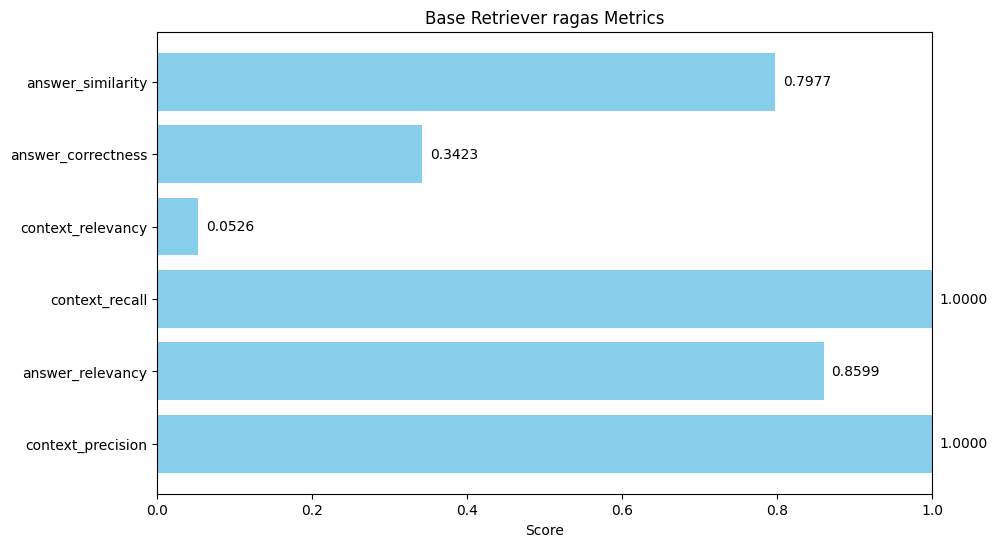

In [ ]:
plot_metrics_with_values(basic_qa_result, "Base Retriever ragas Metrics")
